# Do-It-Yourself

Let's make a bunch of choropleths! In this section, you will practice the [concepts](concepts_D) and [code](lab_D) we have learnt in this block. Happy hacking!

(diy_D:ahah)=
## Data preparation

```{note}
The AHAH dataset was invented by a University of Liverpool team. If you want to find out more about the background and details of the project, have a look at the [information page](https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah) at the CDRC website.
```

We are going to use the Access to Healthy Assets and Hazards (AHAH) index. This is a score that ranks LSOAs (the same polygons we used in [block C](../bC/diy_C)) by the proximity to features of the environment that are considered positive for health (assets) and negative (hazards). The resulting number gives us a sense of how "unhealthy" the environment of the LSOA is. The higher the score, the less healthy the area is assessed to be.

To download the Liverpool AHAH pack, please go over to:

```{admonition} Important
You will need a username and password to download the data. Create it for free at:

> [https://data.cdrc.ac.uk/user/register](https://data.cdrc.ac.uk/user/register)
```

> [Liverpool AHAH GeoData pack](https://data.cdrc.ac.uk/system/files/Access_to_Healthy_Assets_and_Hazards_AHAH/Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012.zip)

Once you have the `.zip` file on your computer, right-click and "Extract all". The resulting folder will contain all you need. For the sake of the example, let's assume you place the resulting folder in the same location as the notebook you are using. If that is the case, you can load up a `GeoDataFrame` of Liverpool neighborhoods with:

```python
import geopandas
lsoas = geopandas.read_file("Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
```

Now, this gets us the geometries of the LSOAs, but not the AHAH data. For that, we need to read in the data and join it to `ahah`. Assuming the same location of the data as above, we can do as follows:

```python
import pandas
ahah_data = pandas.read_csv("Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E0800001/tables/E08000012.csv")
```

(diy_D:ahah_read)=
To read the data, and as follows to join it:

```python
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")
```

Now we're ready to map using the `ahah` object.

## Tasks

### Task I: AHAH choropleths

Create the following choropleths and, where possible, complement them with a figure that displays the distribution of values using a KDE:

- Equal Interval with five classes
- Quantiles with five classes
- Fisher-Jenks with five classes
- Unique Values with the following setup:
    - Split the LSOAs in two classes: above and below the average AHAH score
    - Assign a qualitative label (`above` or `below`) to each LSOA
    - Create a unique value map for the labels you have just created

### Task I Answers

In [76]:
import geopandas as gpd
import pandas as pd
from pysal.viz import mapclassify as mc
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx

lsoas = gpd.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv")
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

In [77]:
ahah.columns

Index(['lsoa11cd', 'geometry', 'lsoa11nm', 'r_rank', 'h_rank', 'g_rank',
       'e_rank', 'r_exp', 'h_exp', 'g_exp', 'e_exp', 'ahah', 'r_ahah',
       'd_ahah', 'r_dec', 'h_dec', 'g_dec', 'e_dec', 'gpp_dist', 'ed_dist',
       'dent_dist', 'pharm_dist', 'gamb_dist', 'ffood_dist', 'pubs_dist',
       'leis_dist', 'blue_dist', 'off_dist', 'tobac_dist', 'green_pas',
       'green_act', 'ur', 'no2_mean', 'pm10_mean', 'so2_mean', 'd_gpp_dist',
       'd_ed_dist', 'd_pharm_dist', 'd_dent_dist', 'd_gamb_dist',
       'd_ffood_dist', 'd_pubs_dist', 'd_leis_dist', 'd_blue_dist',
       'd_off_dist', 'd_tobac_dist', 'd_green_pas', 'd_green_act',
       'd_no2_mean', 'd_pm10_mean', 'd_so2_mean'],
      dtype='object')

#### Equal Interval + Plot + KDEPlot

In [78]:
# Equal Interval k=5

eq_int = mc.EqualInterval(ahah['pm10_mean'], k=5)
eq_int

EqualInterval

   Interval      Count
----------------------
[10.62, 10.80] |    29
(10.80, 10.99] |    37
(10.99, 11.17] |    72
(11.17, 11.36] |   105
(11.36, 11.54] |    55

<Axes: >

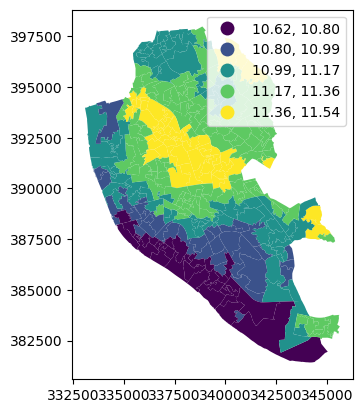

In [79]:
# Eq Int Plot

ahah.plot(column='pm10_mean', scheme='equal_interval', k=5, legend=True)

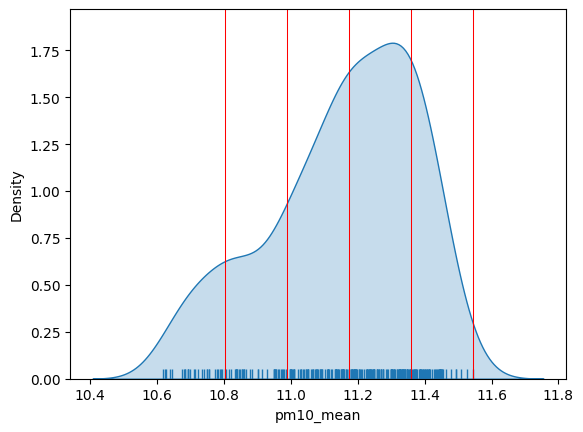

In [80]:
f, ax = plt.subplots(1)

sns.kdeplot(ahah['pm10_mean'], fill=True)

sns.rugplot(ahah['pm10_mean'], alpha=1)

for cut in eq_int.bins:
    ax.axvline(cut, color='red', linewidth=0.75)

plt.show()

#### Quantiles Interval + Plot + KDEPlot

<Axes: >

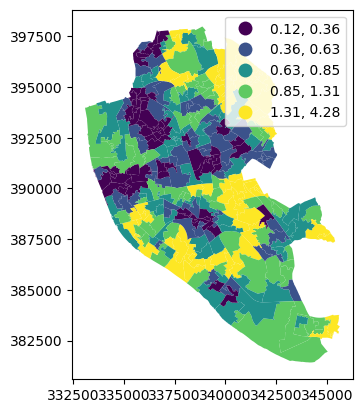

In [81]:
ahah.plot(
    scheme='quantiles',
    column='ffood_dist',
    k=5,
    legend=True
)

In [82]:
quantiles = mc.Quantiles(ahah['ffood_dist'], k=5)
quantiles

Quantiles

  Interval     Count
--------------------
[0.12, 0.36] |    60
(0.36, 0.63] |    59
(0.63, 0.85] |    60
(0.85, 1.31] |    59
(1.31, 4.28] |    60

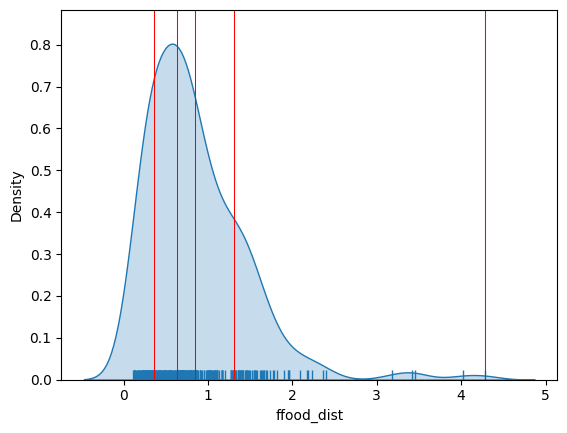

In [83]:
f, ax = plt.subplots(1)

sns.kdeplot(ahah['ffood_dist'], fill=True)

sns.rugplot(ahah['ffood_dist'], alpha=1)

for cut in quantiles.bins:
    ax.axvline(cut, color='red', linewidth=0.75)

plt.show()

#### Fisher Jenks Chloropleth and KDEPlot

In [84]:
fisher_jenks = mc.FisherJenks(ahah['blue_dist'], k=5)
fisher_jenks

FisherJenks

   Interval      Count
----------------------
[ 0.47,  2.18] |    97
( 2.18,  3.61] |   107
( 3.61,  5.55] |    60
( 5.55,  8.61] |    30
( 8.61, 12.72] |     4

<Axes: >

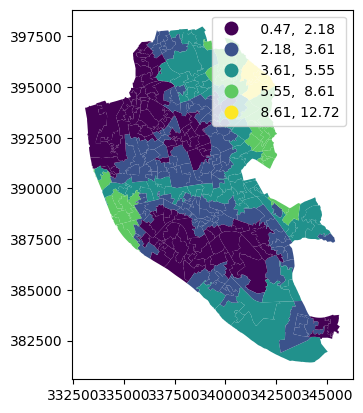

In [85]:
ahah.plot(
    column='blue_dist',
    scheme='fisherjenks',
    k=5,
    legend=True
    )

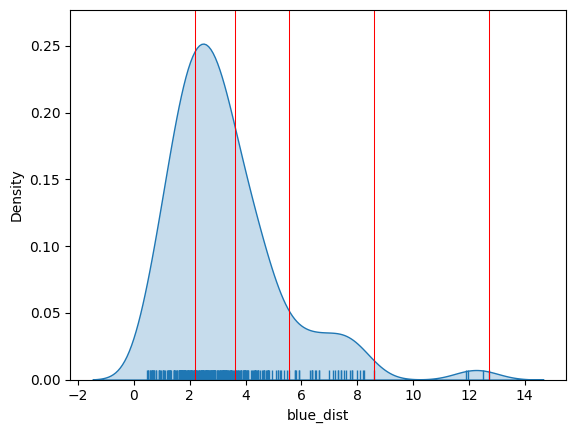

In [86]:
f, ax = plt.subplots(1)

sns.kdeplot(ahah['blue_dist'], fill=True)

sns.rugplot(ahah['blue_dist'], alpha=1)

for cut in fisher_jenks.bins:
    ax.axvline(cut, color='red', linewidth=0.75)

plt.show()

#### Unique Values

In [87]:
mean_ahah = ahah['r_ahah'].mean()
ahah['ahah_bool'] = ahah['r_ahah'].apply(lambda row: "Above" if row > mean_ahah else "Below")

<Axes: >

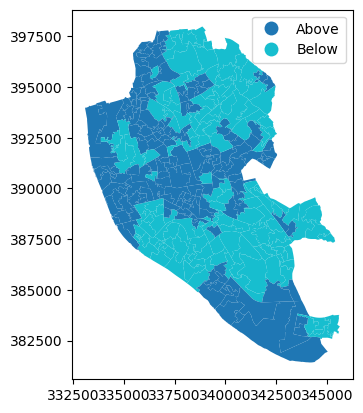

In [88]:
ahah.plot(
    column='ahah_bool',
    legend=True,
    categorical=True
)

### Task II: Zoom maps

Generate the following maps:

- Zoom of the [city centre of Liverpool](https://osm.org/go/euf9EJpQ-?m=) with he same color for every LSOA
- Quantile map of AHAH for all of Liverpool, zoomed into [north of the city centre](https://osm.org/go/euf9TZJ?m=)
- Zoom to [north of the city centre](https://osm.org/go/euf9TZJ?m=) with a quantile map of AHAH for the section only

#### Liverpool City Centre

(388000.0, 391500.0)

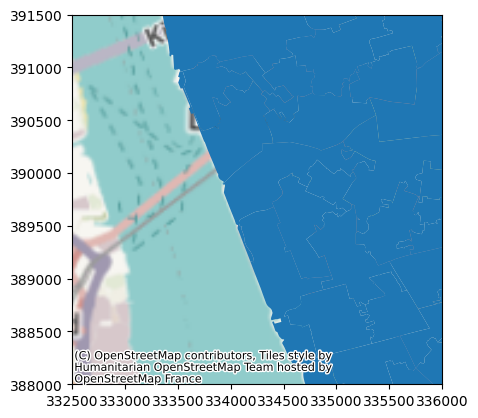

In [93]:
f, ax = plt.subplots(1)
ahah.plot(ax=ax)
cx.add_basemap(ax=ax,crs=ahah.crs)
# city center is around 332500 - 336000W, and 391500 - 388000n
ax.set_xlim(332500, 336000)
ax.set_ylim(388000, 391500)

#### Quantile map for all of liverpool zoomed in

(391000.0, 397000.0)

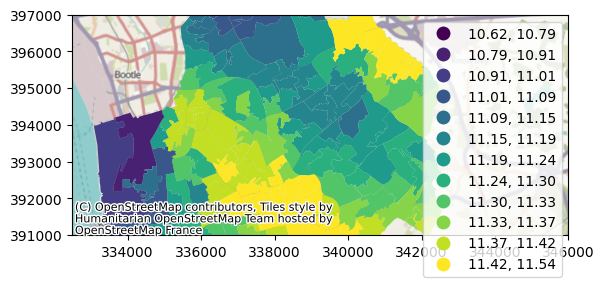

In [112]:
f,ax = plt.subplots(1)
ahah.plot(ax=ax, scheme='quantiles', k=12, column='pm10_mean', legend=True)
cx.add_basemap(ax=ax,crs=ahah.crs)
ax.set_xlim(332500,346000)
ax.set_ylim(391000,397000)

#### Quantile Map for section only

In [106]:
# Just north of city centre is roughly 332500 - 336000W, and 391500 - 388000n

ahah_zoom = ahah.cx[332500:336000, 391000:392000]

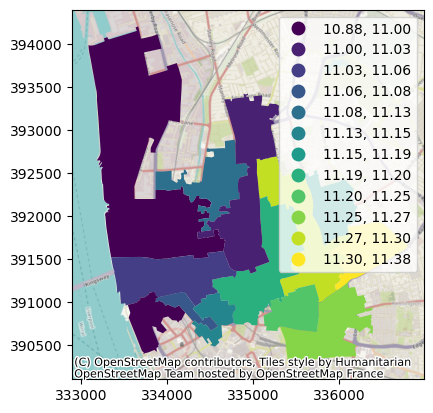

In [108]:
f,ax = plt.subplots(1)
ahah_zoom.plot(ax=ax, scheme='quantiles', k=12, column='pm10_mean', legend=True)
cx.add_basemap(ax=ax,crs=ahah_zoom.crs)